# Batch analysis across mice & regions

In [1]:
%load_ext autoreload
%load_ext skip_kernel_extension
%autoreload 2

## Imports

In [151]:
import logging
import os
import pandas as pd

from constants import *
from utils import *
from logger import logger
from fileops import get_stats_dir, load_stats_dataset
from postpro import *
from plotters import *

logger.setLevel(logging.INFO)

### Load data

In [152]:
sdir = get_stats_dir()
fpaths = [os.path.join(sdir, item) for item in os.listdir(sdir)]
Fstats = pd.concat([load_stats_dataset(fpath) for fpath in fpaths], axis=0)
logger.info('stats dataset:')
Fstats

 05/01/2022 11:49:32: loading data from mouse1_region2.csv
 05/01/2022 11:49:32: loading data from mouse1_region1.csv
 05/01/2022 11:49:33: loading data from mouse7_region2.csv
 05/01/2022 11:49:33: loading data from mouse7_region1.csv
 05/01/2022 11:49:33: loading data from mouse12_region1.csv
 05/01/2022 11:49:33: loading data from mouse10_region1.csv
 05/01/2022 11:49:34: loading data from mouse9_region2.csv
 05/01/2022 11:49:34: loading data from mouse9_region1.csv
 05/01/2022 11:49:34: loading data from mouse6_region1.csv
 05/01/2022 11:49:34: loading data from mouse6_region2.csv
 05/01/2022 11:49:34: stats dataset:


line  trial_length  duration (s)   fps  \
mouse_reg      ROI  run trial                                            
mouse1_region2 106  0   1      line3           100           0.2  3.56   
                        2      line3           100           0.2  3.56   
                        3      line3           100           0.2  3.56   
                        4      line3           100           0.2  3.56   
                        5      line3           100           0.2  3.56   
...                              ...           ...           ...   ...   
mouse6_region2 1286 14  9      line3           100           0.2  3.56   
                        11     line3           100           0.2  3.56   
                        12     line3           100           0.2  3.56   
                        13     line3           100           0.2  3.56   
                        15     line3           100           0.2  3.56   

                               P (MPa)  DC (%)  run ID  valid  \
mouse_reg      ROI  run trial                                   
mouse1_region2 106  0   1          0.0    50.0     742   True   
                        2          0.0    50.0     742   True   
                        3          0.0    50.0     742   True   
                        4          0.0    50.0     742   True   
                        5          0.0    50.0     742   True   
...                                ...     ...     ...    ...   
mouse6_region2 1286 14  9          0.8    80.0     766   True   
                        11         0.8    80.0     766   True   
                        12         0.8    80.0     766   True   
                        13         0.8    80.0     766   True   
                        15         0.8    80.0     766   True   

                               peak displacement velocity (um/s)  motion  \
mouse_reg      ROI  run trial                                              
mouse1_region2 106  0   1                               0.507439   False   
                        2                               0.285719   False   
                        3                               0.377515   False   
                        4                               0.486793   False   
                        5                               0.377771   False   
...                                                          ...     ...   
mouse6_region2 1286 14  9                               0.336987   False   
                        11                              0.678482   False   
                        12                              0.119659   False   
                        13                              0.716342   False   
                        15                              0.205309   False   

                               max pre-stim Z(ΔF/F0)  pre-stim activity?  \
mouse_reg      ROI  run trial                                              
mouse1_region2 106  0   1                   0.197133               False   
                        2                  -0.712225               False   
                        3                  -0.330424               False   
                        4                   0.390796               False   
                        5                   1.388284               False   
...                                              ...                 ...   
mouse6_region2 1286 14  9                  -0.190486               False   
                        11                  1.335852               False   
                        12                 -0.809899               False   
                        13                  1.321706               False   
                        15                  0.305365               False   

                               peak post-stim [Z(ΔF/F0) - Z(ΔF/F0)_stim]  \
mouse_reg      ROI  run trial                                              
mouse1_region2 106  0   1                                       3.065964   
                 

### Plot z-score traces per mouse-region

 05/01/2022 12:03:51: discarding samples with significant motion artefact...
 05/01/2022 12:03:52: discarding samples with pre-stimulus activity...
 05/01/2022 12:03:52: discarding invalid samples...
 05/01/2022 12:03:52: selecting 0.5 - 0.75 quantile slice from peak post-stim [Z(ΔF/F0) - Z(ΔF/F0)_stim] for each mouse_reg & response type & run...
 05/01/2022 12:03:53: discarding samples with significant motion artefact...
 05/01/2022 12:03:53: discarding samples with pre-stimulus activity...
 05/01/2022 12:03:54: discarding invalid samples...
 05/01/2022 12:03:55: sub-indexing data...
 05/01/2022 12:03:55: filtering data...
 05/01/2022 12:03:55: cross-checking filters...
 05/01/2022 12:03:55: grouping by response type, grouping by mouse_reg, averaging, estimating confidence intervals and plotting mean peak post-stim [Z(ΔF/F0) - Z(ΔF/F0)_stim] vs. P (MPa) ...
 05/01/2022 12:04:03: sub-indexing data...
 05/01/2022 12:04:03: filtering data...
 05/01/2022 12:04:03: cross-checking filters..

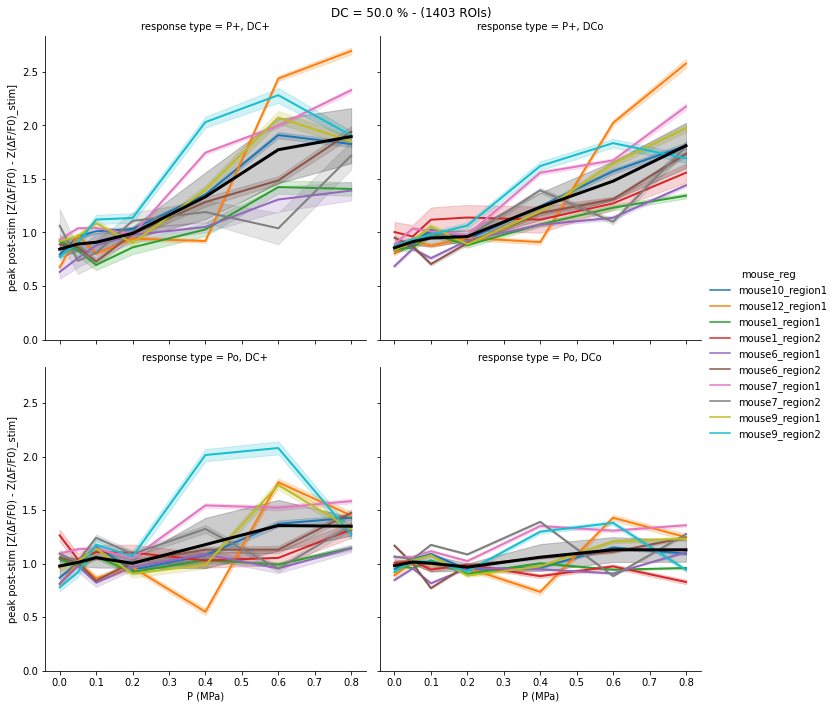

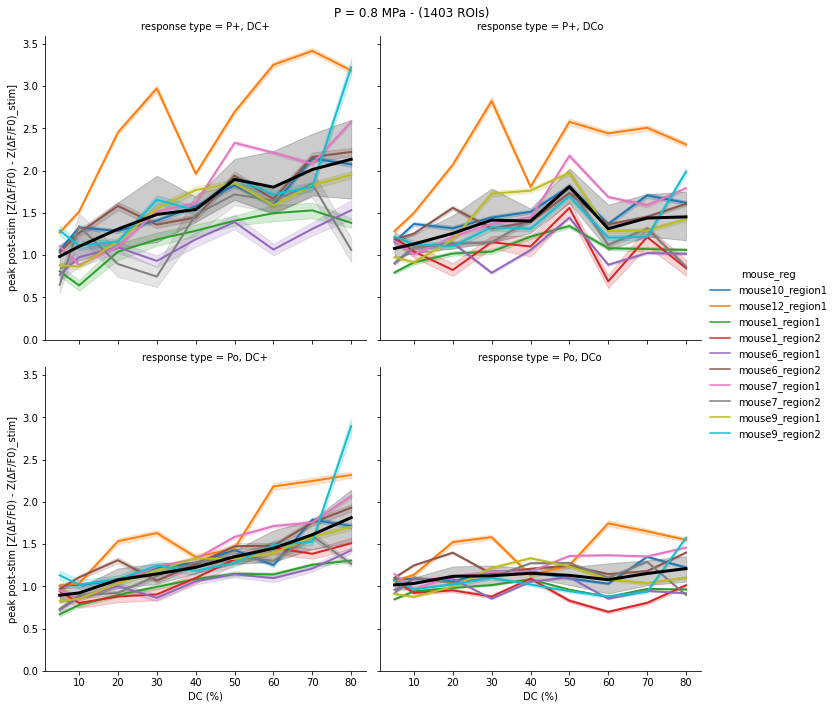

In [160]:
# If specified, select subset of responses that lie within specific quantile interval for each category & run
from constants import ZSCORE_QUANTILE_INTERVAL

# Select quantile interval for each category
subset_idx = get_quantile_indexes(
    included(Fstats),
    ZSCORE_QUANTILE_INTERVAL,
    Label.PEAK_REL_ZSCORE_POSTSTIM,
    groupby=[Label.MOUSEREG, Label.ROI_RESP_TYPE, Label.RUN])

# Plot parameter dependencies of z-scores, grouped by mouse-region and response type,
# for the selected subset
# Extract correct subset of stats dataframe
plt_Fstats = included(Fstats).loc[subset_idx, :]
# Average stats by mouse-region, response type and run 
avg_Fstats = plt_Fstats.groupby([Label.MOUSEREG, Label.ROI_RESP_TYPE, Label.RUN]).mean()
avg_Fstats = resolve_columns(avg_Fstats, [Label.P, Label.DC])
ykey = Label.PEAK_REL_ZSCORE_POSTSTIM
# For each stimulation parameter
for xkey in [Label.P, Label.DC]:
    # Plot parameter dependency of z-scores, grouped by mouse-region and response type
    fig = plot_parameter_dependency(
        plt_Fstats,
        xkey=xkey, ykey=ykey, ybounds=(0, None),
        hue=Label.MOUSEREG, col=Label.ROI_RESP_TYPE,
        add_leg_numbers=False, max_colwrap=2, aspect=1.)
    # Add average trace across mouse-regions, for each response type
    xdep_avg_Fstats = get_xdep_data(avg_Fstats, xkey)
    for ax, (ig, group) in zip(fig.axes, xdep_avg_Fstats.groupby(Label.ROI_RESP_TYPE)):
        sns.lineplot(data=group, x=xkey, y=ykey, ax=ax, color='BLACK', lw=3, legend=False)